<a href="https://colab.research.google.com/github/gforconi/UTNIA2025/blob/main/widrow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from IPython import display
import numpy as np
import time
import matplotlib.pyplot as plt

class perceptron_plot:
    def __init__(self, X, Y, delay) -> None:
        self.X = X
        self.Y = Y
        self.delay = delay
        x1_min = np.min(X[:,0])
        x2_min = np.min(X[:,1])
        x1_max = np.max(X[:,0])
        x2_max = np.max(X[:,1])
        self.x1_min = x1_min - 0.75*(x1_max - x1_min)
        self.x1_max = x1_max + 0.75*(x1_max - x1_min)
        self.x2_min = x2_min - 0.75*(x2_max - x2_min)
        self.x2_max = x2_max + 0.75*(x2_max - x2_min)
        self.fig = plt.figure(figsize = (10,8))
        self.ax = self.fig.subplots()
        self.ax.set_xlim(self.x1_min, self.x1_max, auto=False)
        self.ax.set_ylim(self.x2_min, self.x2_max, auto=False)

    def graficar(self, W, x0, epoch, fila) -> None:
        display.clear_output(wait =True)
        plt.cla()
        #self.ax = self.fig.subplots()

        self.ax.set_xlim(self.x1_min, self.x1_max)
        self.ax.set_ylim(self.x2_min, self.x2_max)
        plt.title( 'epoch ' + str(epoch) )
        # ploteo puntos positivos
        self.ax.plot(self.X[self.Y==1,0], self.X[self.Y==1,1], 'o', color="green", markersize=10)
        # ploteo puntos negativos
        self.ax.plot(self.X[self.Y==0,0], self.X[self.Y==0,1], 'o', color="blue", markersize=10)

        # Sobreploteo el punto que no coincidio
        if(fila>=0):
            self.ax.plot(self.X[fila,0], self.X[fila,1], 'o',
                         color= ('green' if self.Y[fila]==1 else 'blue'),
                         markersize= 12, markeredgecolor= 'red')

        #dibujo le recta
        vx2_min = -(W[0]*self.x1_min + x0)/W[1]
        vx2_max = -(W[0]*self.x1_max + x0)/W[1]

        self.ax.plot([self.x1_min, self.x1_max],
                     [vx2_min, vx2_max],
                     linewidth = 2,
                     color = 'red',
                     alpha = 0.5)

        display.display(plt.gcf())
        #plt.cla()
        time.sleep(self.delay)


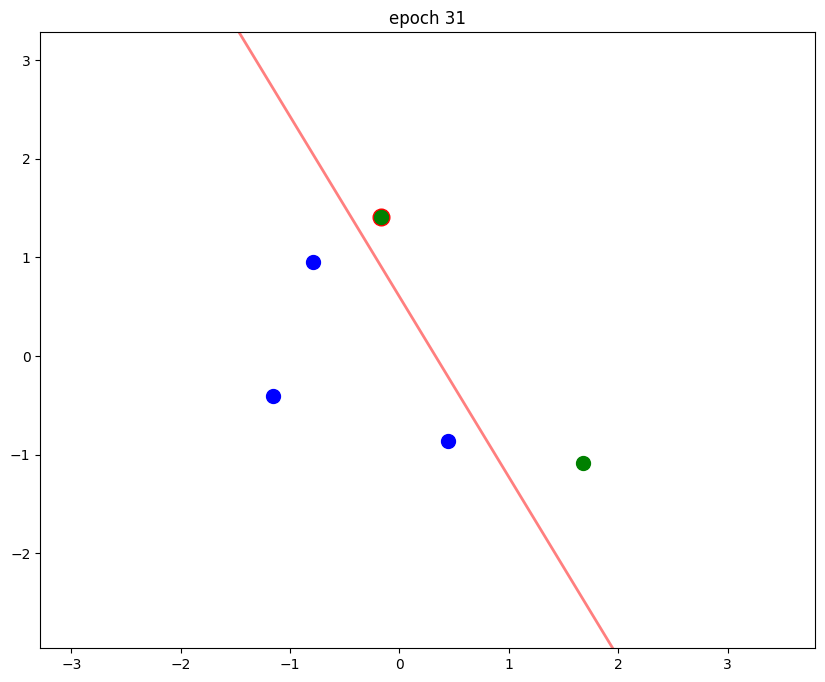

In [ ]:
# combinador lineal y neurona no lineal

import math
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import standardize

def func_eval(fname, x):
    match fname:
        case "purelin":
            y = x
        case "logsig":
            y = 1.0 / ( 1.0 + math.exp(-x) )
        case "tansig":
            y = 2.0 / ( 1.0 + math.exp(-2.0*x) ) - 1.0
    return y

def deriv_eval(fname, y):  #atencion que y es la entrada y=f( x )
    match fname:
        case "purelin":
            d = 1.0
        case "logsig":
            d = y*(1.0-y)
        case "tansig":
            d = 1.0 - y*y
    return d


# Ejemplo
entrada = [ [0.7, 1.3], [2.0, 1.1], [1.0, 1.9],
            [3.0, 1.0], [1.5, 2.1] ]
salida = [0,0,0,1,1]

# Paso las listas a numpy
X = np.array(entrada)
Y = np.array(salida)

# Estandarizo X
X = standardize(X, columns=[0,1])

# incializo los graficos
grafico = perceptron_plot(X, Y, 0.2)

# Tamano datos
X_row = X.shape[0]
X_col = X.shape[1]

# Incializo la recta azarosamente
np.random.seed(1021911) #mi querida random seed para que las corridas sean reproducibles
W = np.array( np.random.uniform(-0.5, 0.5, size=X_col))
x0 = np.random.uniform(-0.5, 0.5)


# Inicializo
FUNC = 'logsig'  # uso la logistica
epoch_limit = 500    # para terminar si no converge
Error_umbral = 0.001
learning_rate = 0.1
Error_last = 0    # lo debo poner algo dist a 0 la primera vez
Error = 1
epoch = 0

while ( math.fabs(Error_last-Error)>Error_umbral and (epoch < epoch_limit)):
    epoch += 1
    Error_last = Error

    #recorro siempre TODA la entrada
    for fila in range(X_row):
        #calculo el estimulo
        estimulo = x0 + W[0]*X[fila,0] + W[1]*X[fila,1]

        #funcion de activacion
        y = func_eval(FUNC, estimulo)

        Error = Y[fila]-y

        # actualizo W y x0
        # derivada parcial del error cuadratico medio
        grad_W0 = -2.0 * Error * deriv_eval(FUNC,y) * X[fila,0]
        grad_W1 = -2.0 * Error * deriv_eval(FUNC,y) * X[fila,1]
        grad_x0 = -2.0 * Error * deriv_eval(FUNC,y) * 1.0

        W[0] = W[0] - learning_rate * grad_W0
        W[1] = W[1] - learning_rate * grad_W1
        x0   =  x0  - learning_rate * grad_x0

        grafico.graficar(W, x0, epoch, fila)



grafico.graficar(W, x0, epoch, -1)
print(epoch, W, x0)